<a href="https://colab.research.google.com/github/ali-talebi/Task_sf/blob/main/Task1_sf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [57]:
data = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv")

In [58]:
data

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [59]:
data.isnull().sum()

order_id             0
user_id              0
created_at           0
discount_cost        0
discount_type    22132
basket               0
dtype: int64

In [60]:

data["created_at"] = pd.to_datetime(data["created_at"])
data['year'] = data['created_at'].dt.year 
data['month'] = data['created_at'].dt.month 
data['day'] = data['created_at'].dt.day
data['dayofyear'] = pd.DatetimeIndex(data['created_at']).dayofyear 
data['weekofyear'] = pd.DatetimeIndex(data['created_at']).weekofyear 
data["dayofweek"]  = pd.DatetimeIndex(data['created_at']).dayofweek 
to_one_hot = pd.to_datetime(data['dayofweek']).dt.day_name 
data['is_month_start'] = pd.DatetimeIndex(data['created_at']).is_month_start
data['is_month_end'] = pd.DatetimeIndex(data['created_at']).is_month_end 
data = pd.get_dummies(data, columns=['is_month_start'], drop_first=True, prefix='m_start')
data = pd.get_dummies(data, columns=['is_month_end'], drop_first=True, prefix='m_end')


<ipython-input-60-7b37b1003854>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['weekofyear'] = pd.DatetimeIndex(data['created_at']).weekofyear


In [61]:
data

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
0,1,1,2021-04-12,10000,1.0,12000,2021,4,12,102,15,0,0,0
1,2,2,2021-05-09,0,NaN,20000,2021,5,9,129,18,6,0,0
2,3,3,2021-05-09,10000,1.0,14000,2021,5,9,129,18,6,0,0
3,4,4,2021-11-10,0,NaN,15000,2021,11,10,314,45,2,0,0
4,5,5,2021-11-10,10000,1.0,16000,2021,11,10,314,45,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022,7,31,212,30,6,0,1
29053,29054,9985,2022-07-31,0,NaN,25000,2022,7,31,212,30,6,0,1
29054,29055,8843,2022-07-31,6000,1.0,24000,2022,7,31,212,30,6,0,1
29055,29056,8703,2022-07-31,0,NaN,40000,2022,7,31,212,30,6,0,1


In [74]:
print("count of user unique : "  , len(data.user_id.unique()) ) 

count of user unique :  9985


### تعداد خرید مشتریان بر اساس آیدی کاربر 
###### مشتری با ایدی 1984 به میزان 117 بار ثبت سفارش انجام داده است 

In [104]:
data.user_id.value_counts()

1984    117
3276     70
4360     67
806      64
500      63
       ... 
4624      1
4623      1
4622      1
4621      1
9985      1
Name: user_id, Length: 9985, dtype: int64

In [107]:
data[data["user_id"] == 1984 ]

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
2774,2775,1984,2022-02-08,0,NaN,28000,2022,2,8,39,6,1,0,0
2875,2876,1984,2022-02-09,0,NaN,28000,2022,2,9,40,6,2,0,0
2941,2942,1984,2022-02-10,0,NaN,28000,2022,2,10,41,6,3,0,0
3164,3165,1984,2022-02-12,0,NaN,28000,2022,2,12,43,6,5,0,0
3168,3169,1984,2022-02-12,0,NaN,14000,2022,2,12,43,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844,27845,1984,2022-07-26,0,NaN,72000,2022,7,26,207,30,1,0,0
28043,28044,1984,2022-07-27,0,NaN,72000,2022,7,27,208,30,2,0,0
28229,28230,1984,2022-07-28,0,NaN,66000,2022,7,28,209,30,3,0,0
28672,28673,1984,2022-07-30,0,NaN,72000,2022,7,30,211,30,5,0,0


#####  در نمودار زیر مشاهده میشود نزدیک به 5000 آیدی فقط 1 بار خرید انجام داده اند 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


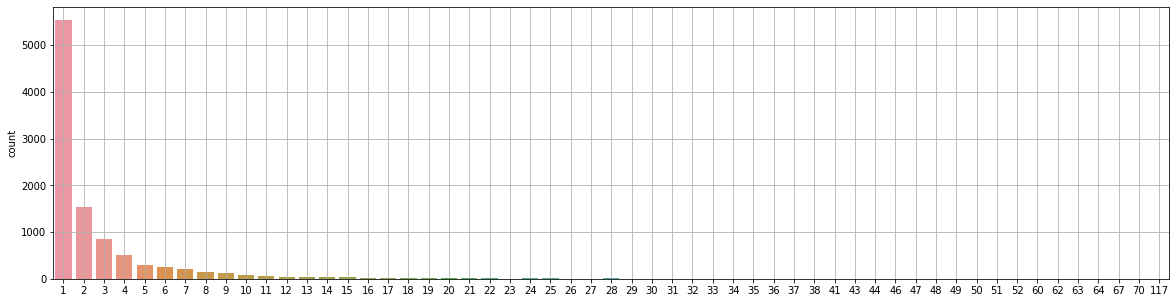

In [150]:
s = data.user_id.value_counts()
plt.figure(figsize = (20 , 5 ))
sns.countplot(s.values )
plt.grid()
plt.show()

In [109]:
s = data.user_id.value_counts()

In [110]:
s 

1984    117
3276     70
4360     67
806      64
500      63
       ... 
4624      1
4623      1
4622      1
4621      1
9985      1
Name: user_id, Length: 9985, dtype: int64

#### در سلول زیر تعداد آیدی هایی که یک بار خرید انجام داده اند رو مشاهده میکنید 

In [114]:
count_1 = 0 
for i in s.values : 
  if i == 1 : 
    count_1 += 1 

print("counts of 1 buy : " , count_1 ) 


counts of 1 buy :  5541


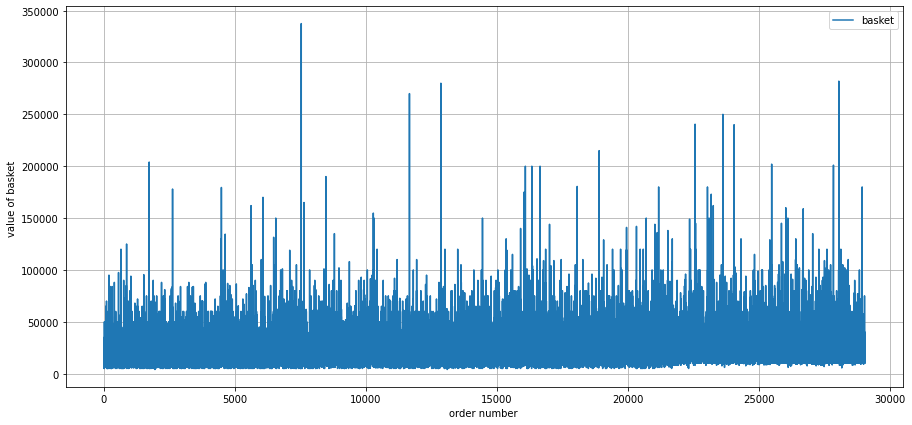

In [139]:
plt.figure(figsize = (15 , 7 ))
plt.plot(data["basket"] , label = "basket" )
plt.legend()
plt.ylabel("value of basket ")
plt.xlabel("order number ")
plt.grid()
plt.show()

In [118]:
x = data.month.unique()
y = []
total_data_frames_divide_any_month = [ ]
for i  , j in enumerate(x) : 
  s = data[data.month == j ]
  total_data_frames_divide_any_month.append( s.basket ) 
  

##### در شکل زیر میزان خرید در هر ماه مشاهده میکنید 

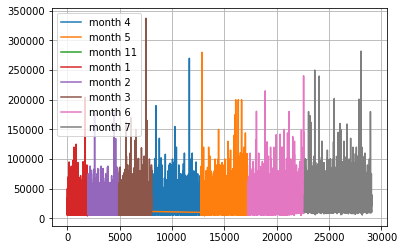

In [128]:
for i in range(len(x)) : 
  plt.plot(total_data_frames_divide_any_month[i] , label = f"month {x[i]}")

plt.legend()
plt.grid()
plt.show()

#### همانطور که مشاهده میکنید در ماه 7 ام میزان 6395 تا سفارش داشته ایم که بیشترین میزان سفارش در این ماه از سال است 

In [142]:
data.month.value_counts()

7     6395
6     5419
4     4714
5     4481
3     3132
2     2915
1     1999
11       2
Name: month, dtype: int64

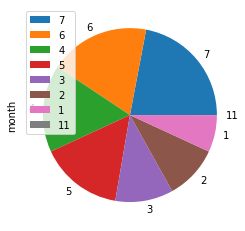

In [143]:
data.month.value_counts().plot(kind = "pie" )
plt.legend()

##### همانطور که مشاهده میکنید در 5 امین روز هفته نسبت به بقیه روز ها در سال بیشترین خرید انجام شده است 

In [146]:
data.dayofweek.value_counts()

4    5227
3    4360
6    3988
5    3925
1    3921
2    3841
0    3795
Name: dayofweek, dtype: int64

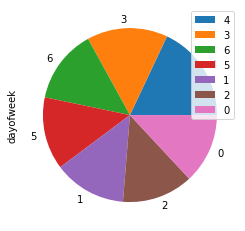

In [145]:
data.dayofweek.value_counts().plot(kind = "pie" )
plt.legend()

#### در شکل زیر به ازای هر ماه در سال میزان سفارشات در روز های هفته مشخص شده است 

This Month is : 4 
4    902
3    699
5    653
0    647
1    628
6    607
2    578
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  902


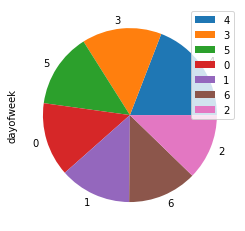

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 5 
1    747
4    745
6    675
0    653
3    563
5    554
2    544
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  2 count :  747


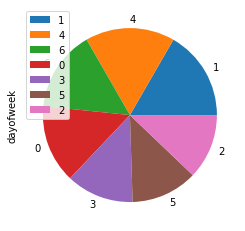

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 11 
2    2
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  3 count :  2


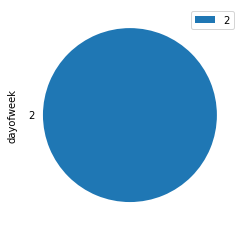

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 1 
4    339
0    321
3    310
5    300
6    276
2    232
1    221
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  339


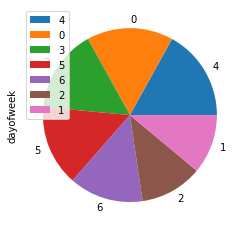

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 2 
4    558
3    462
1    407
2    379
0    375
5    369
6    365
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  558


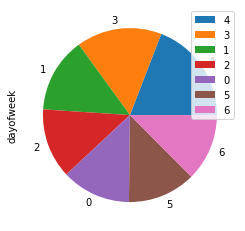

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 3 
2    518
1    505
3    500
4    461
6    399
5    390
0    359
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  3 count :  518


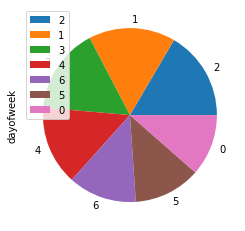

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 6 
3    1001
4     915
2     834
6     730
5     673
1     644
0     622
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  4 count :  1001


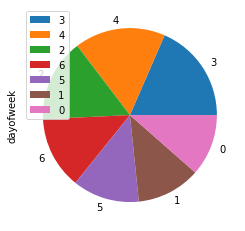

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----
This Month is : 7 
4    1307
5     986
6     936
3     825
0     818
1     769
2     754
Name: dayofweek, dtype: int64
بیشترین خرید  در روز  5 count :  1307


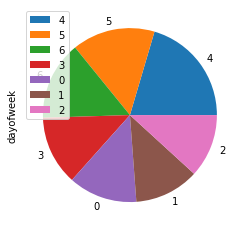

-----****----------****----------****----------****----------****----------****----------****----------****----------****----------****-----


In [153]:
monthes = data.month.unique()
y = []
for i in monthes : 
  print(f"This Month is : {i} ")
  every_month = data[ data["month"] == i ]
  s = every_month.dayofweek.value_counts()
  print(s)
  print("بیشترین خرید  در روز "  , s.index[0]+1 , "count : " , s.values[0])
  every_month.dayofweek.value_counts().plot(kind = "pie" )
  plt.legend()
  plt.show()  
  
  print('-----****-----' * 10 )
  

  



In [154]:
data.year.unique()

array([2021, 2022])

In [155]:
data.dayofyear 

0        102
1        129
2        129
3        314
4        314
        ... 
29052    212
29053    212
29054    212
29055    212
29056    212
Name: dayofyear, Length: 29057, dtype: int64

In [161]:
df = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [162]:
df["created_at"] = pd.to_datetime(df["created_at"]) 

In [163]:
def get_month(x): return dt.datetime(x.year, x.month, 1) 

In [165]:
df['Transaction_created_at'] = df['created_at'].apply(get_month) 


In [166]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket,Transaction_created_at
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01
1,2,2,2021-05-09,0,NaN,20000,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01
3,4,4,2021-11-10,0,NaN,15000,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01
...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022-07-01
29053,29054,9985,2022-07-31,0,NaN,25000,2022-07-01
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-01
29055,29056,8703,2022-07-31,0,NaN,40000,2022-07-01


In [167]:
grouping = df.groupby('user_id')['Transaction_created_at']

In [168]:
df['Cohort_date'] = grouping.transform('min')

In [169]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket,Transaction_created_at,Cohort_date
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01
1,2,2,2021-05-09,0,NaN,20000,2021-05-01,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01
3,4,4,2021-11-10,0,NaN,15000,2021-11-01,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01,2021-11-01
...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022-07-01,2022-05-01
29053,29054,9985,2022-07-31,0,NaN,25000,2022-07-01,2022-07-01
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07-01,2022-07-01
29055,29056,8703,2022-07-31,0,NaN,40000,2022-07-01,2022-07-01


In [170]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [171]:
transcation_year, transaction_month, _ = get_date_int(df, 'Transaction_created_at')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'Cohort_date')

In [172]:
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month

In [173]:
df['CohortIndex'] = years_diff * 12 + months_diff  + 1 

In [174]:
grouping = df.groupby(['Cohort_date', 'CohortIndex']) 

In [175]:
cohort_data = grouping['user_id'].apply(pd.Series.nunique)

In [176]:
cohort_data = cohort_data.reset_index()

In [178]:
cohort_counts = cohort_data.pivot(index='Cohort_date',
                                 columns ='CohortIndex',
                                 values = 'user_id')

In [180]:
cohort_data

,Cohort_date,CohortIndex,user_id
0,2021-04-01,1,1
1,2021-04-01,12,1
2,2021-04-01,14,1
3,2021-05-01,1,2
4,2021-05-01,11,1
5,2021-05-01,14,1
6,2021-05-01,15,1
7,2021-11-01,1,2
8,2021-11-01,3,1
9,2021-11-01,5,1


In [179]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,11,12,14,15
Cohort_date,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,11,12,14,15
Cohort_date,,,,,,,,,,,
2021-04-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN
2021-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,50.0,50.0
2021-11-01,100.0,NaN,50.0,NaN,50.0,50.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,30.7,24.5,25.4,21.2,21.3,21.7,NaN,NaN,NaN,NaN
2022-02-01,100.0,25.0,25.5,23.5,23.0,21.9,NaN,NaN,NaN,NaN,NaN
2022-03-01,100.0,24.3,21.8,20.6,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,100.0,26.4,24.4,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,100.0,29.5,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,100.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


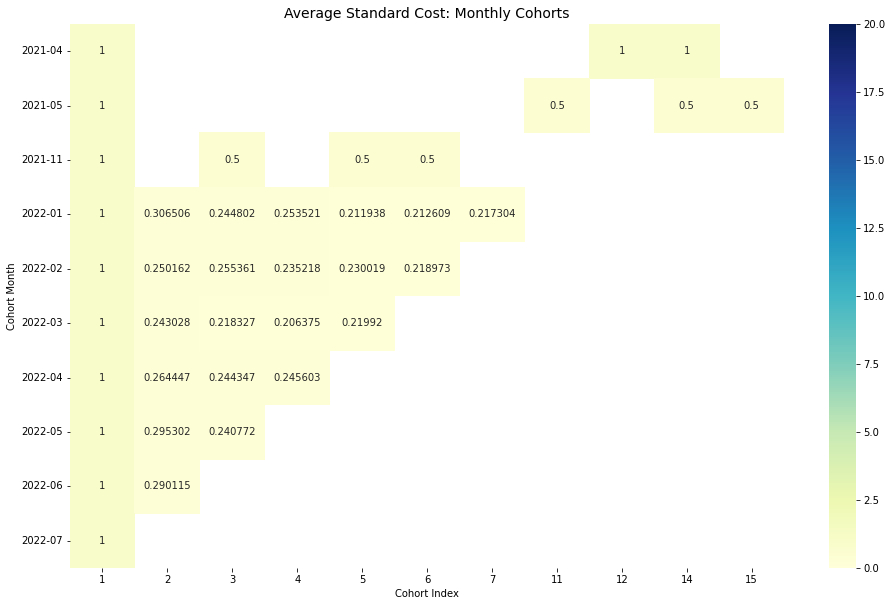

In [184]:
retention.index  = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [156]:
grouping = data.groupby('user_id')['month'] 

In [157]:
grouping

In [159]:
data["cohort_month"] = grouping.transform('min')

In [160]:
data

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True,cohort_month
0,1,1,2021-04-12,10000,1.0,12000,2021,4,12,102,15,0,0,0,3
1,2,2,2021-05-09,0,NaN,20000,2021,5,9,129,18,6,0,0,5
2,3,3,2021-05-09,10000,1.0,14000,2021,5,9,129,18,6,0,0,3
3,4,4,2021-11-10,0,NaN,15000,2021,11,10,314,45,2,0,0,3
4,5,5,2021-11-10,10000,1.0,16000,2021,11,10,314,45,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022,7,31,212,30,6,0,1,5
29053,29054,9985,2022-07-31,0,NaN,25000,2022,7,31,212,30,6,0,1,7
29054,29055,8843,2022-07-31,6000,1.0,24000,2022,7,31,212,30,6,0,1,7
29055,29056,8703,2022-07-31,0,NaN,40000,2022,7,31,212,30,6,0,1,7
